In [235]:
import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

import explore_utils
from prepare_utils import split_data

import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

import wrangle as w

from scipy import stats

In [40]:
df = w.prep_zillow()

In [41]:
df.columns

Index(['parcelid', 'id', 'bathrooms', 'bedrooms', 'sqft', 'latitude',
       'longitude', 'regionidcity', 'regionidzip', 'property_value',
       'transaction_date', 'age', 'county', 'bathrooms_1.0', 'bathrooms_1.5',
       'bathrooms_2.0', 'bathrooms_2.5', 'bathrooms_3.0', 'bathrooms_3.5',
       'bathrooms_4.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'county_LA', 'county_Orange', 'county_Ventura'],
      dtype='object')

In [42]:
train, _, _ = split_data(df, validate_size=.15, test_size=.15, 
                         stratify_col='county', random_state=123)

In [43]:
train = train[['bathrooms', 'bedrooms', 'county',
               'sqft', 'age', 'property_value']]

In [44]:
explore_utils.get_cat_and_cont_cols(train)

(['bathrooms', 'bedrooms', 'county'], ['sqft', 'age', 'property_value'])

**Univariate Analysis**

- categorical counts and frequencies
- numerical stats for continuous features and target

BATHROOMS


,bathrooms,Count,Frequency
0,2.00,14578,0.46
1,3.00,6780,0.22
2,1.00,5271,0.17
3,2.50,2649,0.08
4,4.00,1066,0.03
5,1.50,552,0.02
6,3.50,499,0.02


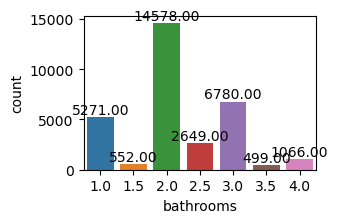


BEDROOMS


,bedrooms,Count,Frequency
0,3,15014,0.48
1,4,9466,0.30
2,2,5098,0.16
3,5,1817,0.06


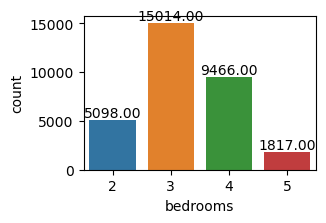


COUNTY


,county,Count,Frequency
0,LA,20117,0.64
1,Orange,8513,0.27
2,Ventura,2765,0.09


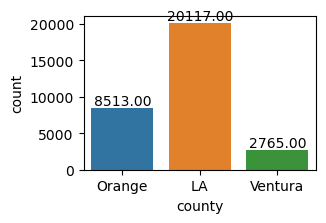

In [45]:
explore_utils.explore_univariate_categorical_cols(train)

Descriptive Stats:



,sqft,property_value,age
count,31395.00,31395.00,31395.00
mean,1777.20,414625.58,52.50
std,676.90,285793.91,21.14
min,500.00,50067.00,1.00
25%,1277.00,196456.00,39.00
50%,1627.00,359103.00,55.00
75%,2144.00,559000.00,65.00
max,4997.00,1500000.00,105.00


------------------------------------------------------------ 
 SQFT 

Most Frequent Values:
1120    77
1200    76
1176    57
Name: sqft, dtype: int64


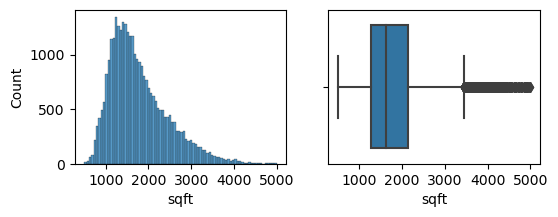


------------------------------------------------------------ 
 PROPERTY_VALUE 

Most Frequent Values:
600000    22
455000    20
550000    18
Name: property_value, dtype: int64


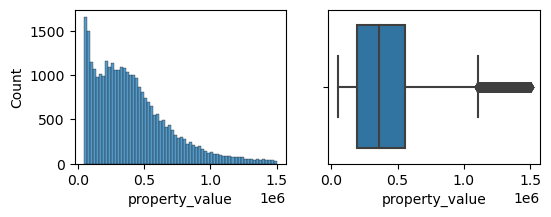


------------------------------------------------------------ 
 AGE 

Most Frequent Values:
61    1204
66    1033
62     981
Name: age, dtype: int64


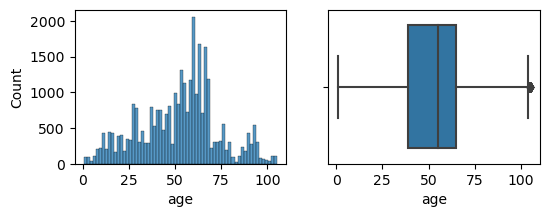

In [46]:
explore_utils.explore_univariate_continuous_cols(train,
                                                 cont_cols=['sqft', 'property_value', 'age'])

Notes:

- sqft and value distributions are right-skewed.

- Typical home:
    - is 3bed/2bath
    - in LA county
    - 1000-2000 sqft
    - 100k-500k

Find target distribution

- property value follows a distribution similar to poisson or gamma

<Axes: ylabel='Count'>

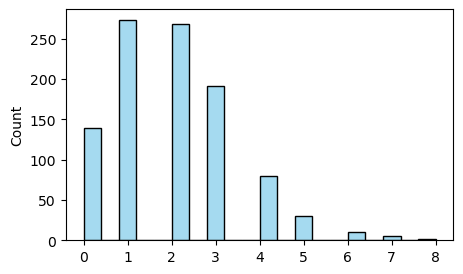

In [47]:
plt.figure(figsize=(5,3))
# Generate random data following a Poisson distribution
lambda_param = 2  # Poisson distribution parameter
data = np.random.poisson(lambda_param, size=1000)

# Plot the distribution using Seaborn
sns.histplot(data, color='skyblue')

<Axes: ylabel='Count'>

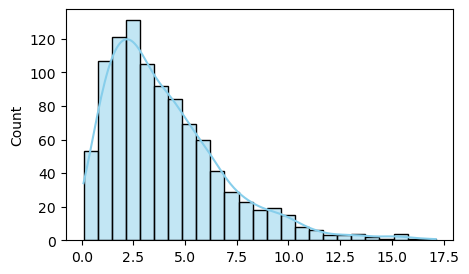

In [48]:
plt.figure(figsize=(5,3))
# Generate random data following a Gamma distribution
shape_param = 2  # Shape parameter (alpha)
scale_param = 2  # Scale parameter (beta)
data = np.random.gamma(shape_param, scale=scale_param, size=1000)

# Plot the distribution using Seaborn
sns.histplot(data, kde=True, color='skyblue')


**Bivariate Stats**

- A. Property value correlations with continuous features
- B. Property value for each category

A.

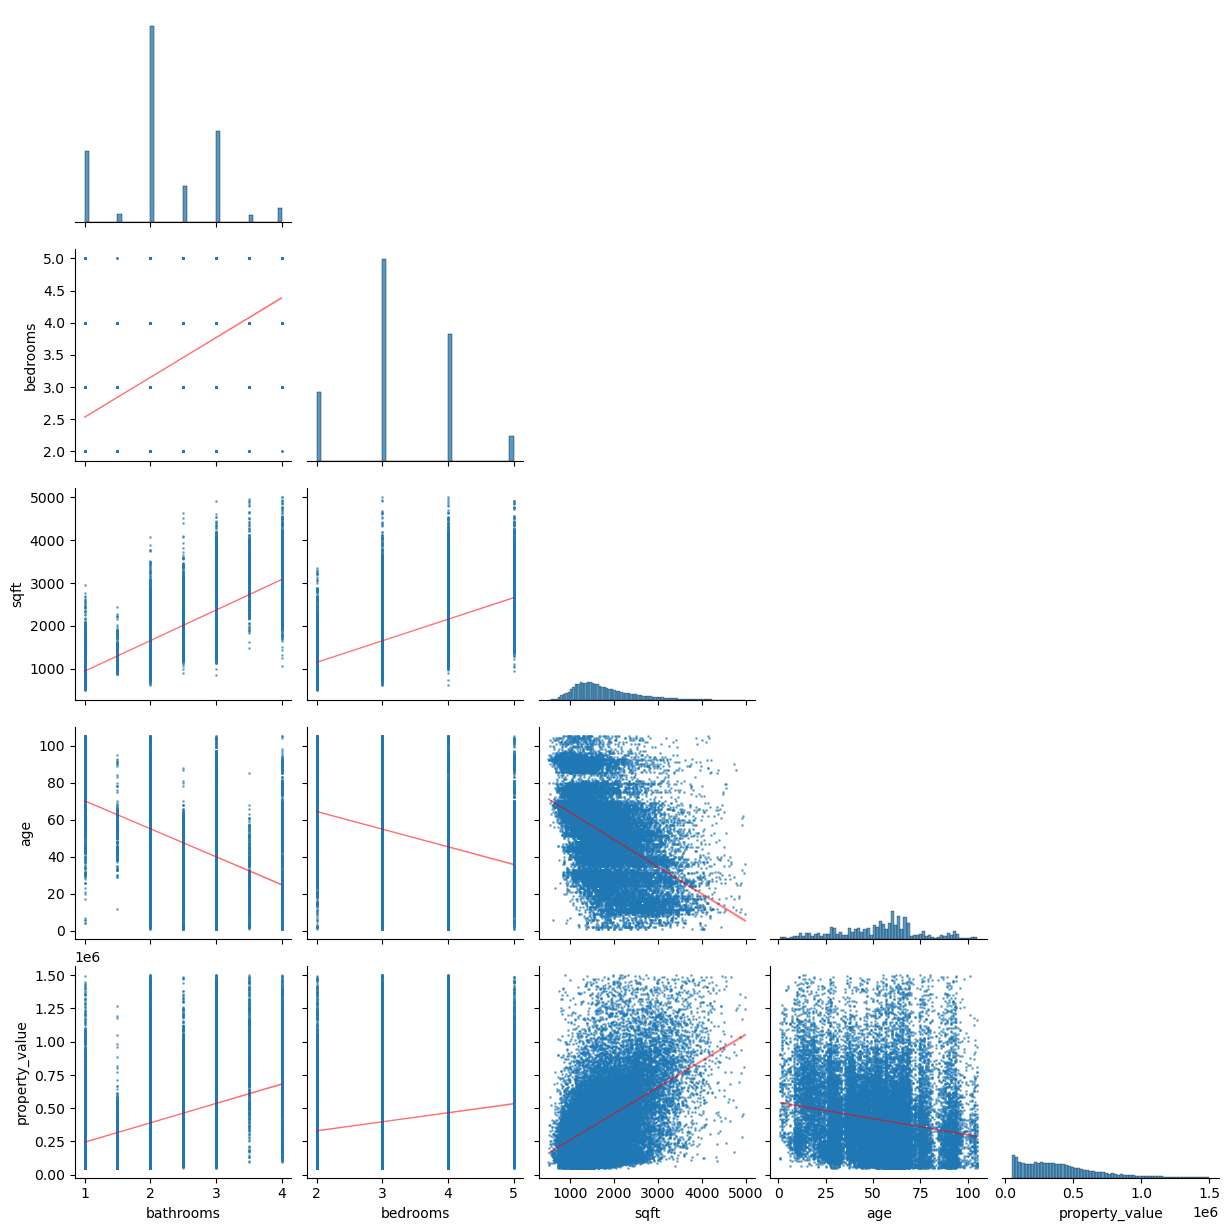

In [49]:
sns.pairplot(data=train, kind='reg', corner=True,
             plot_kws={'scatter_kws':{'s':1, 'alpha':.5},
                       'line_kws':{'linewidth':1, 'alpha':.5, 'color':'red'}})

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_10160/2950996863.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_10160/2950996863.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


<Axes: >

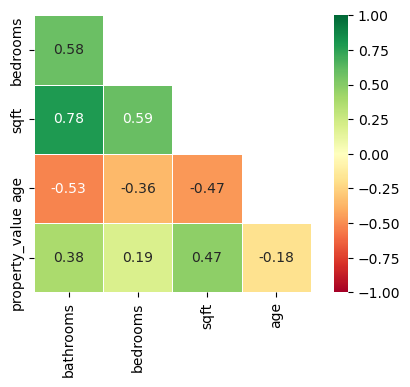

In [50]:
plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                     cmap='RdYlGn', vmin=-1, vmax=1, square=True)

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_10160/925584279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()['property_value'].sort_values(ascending=False).to_frame(),


<Axes: >

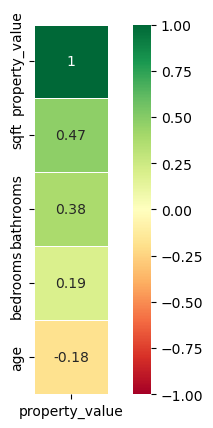

In [51]:
sns.heatmap(train.corr()['property_value'].sort_values(ascending=False).to_frame(),
            linewidths=.5, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1, square=True)

In [52]:
def explore_bivariate_cont_to_cont_target(df, target, cont_cols=None):
    '''
    Explores categorical feature relationships to continuous target
    '''
    if cont_cols == None:
        cont_cols = get_cat_and_cont_cols(df)[1]
    
    sns.pairplot(data=df[cont_cols], kind='reg', corner=True,
                 plot_kws={'scatter_kws':{'s':1, 'alpha':.5},
                           'line_kws':{'linewidth':1, 'alpha':.5, 'color':'red'}})
    plt.show()
    
    plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

    mask = np.triu(np.ones_like(df.corr().iloc[1:,:-1]),k=1)
    sns.heatmap(df.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                         cmap='RdYlGn', vmin=-1, vmax=1, square=True)
    plt.show()
    
    sns.heatmap(df.corr()[target].sort_values(ascending=False).to_frame(),
            linewidths=.5, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1, square=True)
    plt.show()

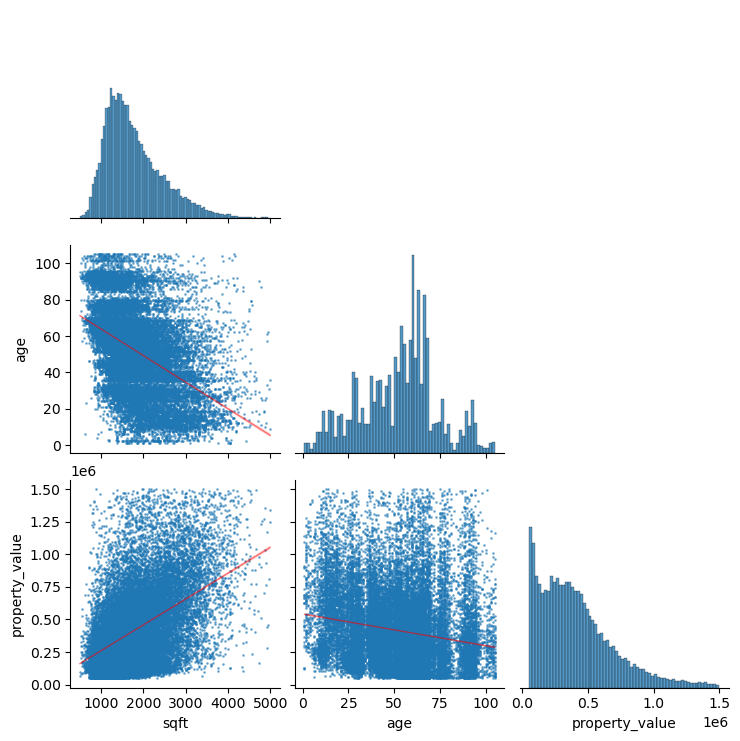

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_10160/1470874836.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_10160/1470874836.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


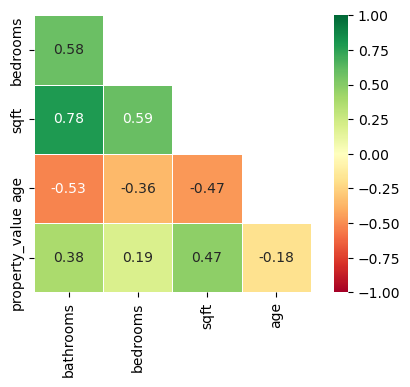

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_10160/1470874836.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[target].sort_values(ascending=False).to_frame(),


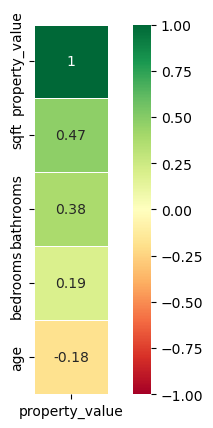

In [53]:
explore_bivariate_cont_to_cont_target(train, 'property_value', cont_cols=['sqft', 'age', 'property_value'])

Insights:
- sqft shows a strong relationship with property value
- bathrooms shows a moderate relationship, but it is strongly related to sqft

B.

In [54]:
cat_cols = ['bathrooms', 'bedrooms', 'county']
for col in cat_cols:
    display(train.groupby(col)['property_value'].describe().T)

bathrooms,1.00,1.50,2.00,2.50,3.00,3.50,4.00
count,5271.00,552.00,14578.00,2649.00,6780.00,499.00,1066.00
mean,299696.47,313413.88,353446.98,514635.76,519509.37,864760.43,745643.77
std,210972.36,175280.74,250232.19,244036.64,301000.49,308995.77,351642.28
min,50270.00,50516.00,50067.00,51614.00,52759.00,94107.00,97640.00
25%,151244.00,195012.50,153566.75,344422.00,280635.00,666929.00,471968.00
50%,261397.00,312590.00,311972.00,503583.00,478442.00,864750.00,732490.00
75%,390000.00,420000.00,477237.50,667919.00,705390.25,1088708.50,1015310.50
max,1493861.00,1270326.00,1500000.00,1483677.00,1500000.00,1500000.00,1500000.00


bedrooms,2,3,4,5
count,5098.00,15014.00,9466.00,1817.00
mean,349268.41,384986.85,472191.52,543006.12
std,250942.73,269587.53,303123.68,320177.80
min,50071.00,50067.00,50068.00,50272.00
25%,169925.75,179051.75,236098.50,299274.00
50%,292000.00,338470.00,423769.00,501370.00
75%,451719.75,513222.75,649931.75,740050.00
max,1493861.00,1500000.00,1500000.00,1490000.00


county,LA,Orange,Ventura
count,20117.00,8513.00,2765.00
mean,380198.96,481781.73,458336.24
std,282446.22,290397.28,250969.37
min,50067.00,50091.00,50640.00
25%,168903.00,269116.00,292260.00
50%,311846.00,445088.00,435323.00
75%,503100.00,654567.00,583568.00
max,1500000.00,1499208.00,1500000.00


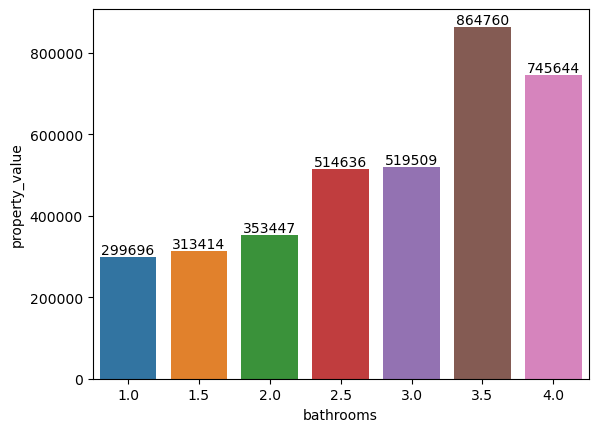

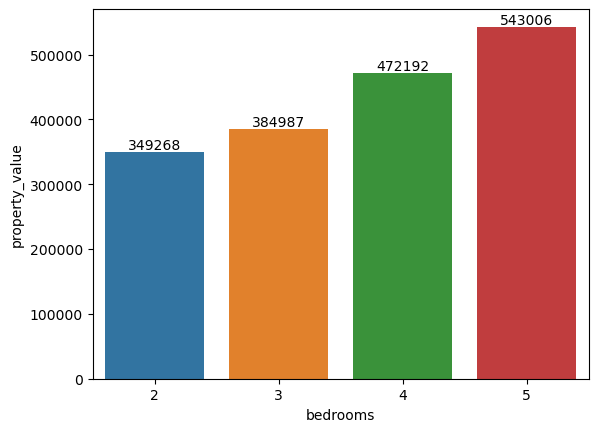

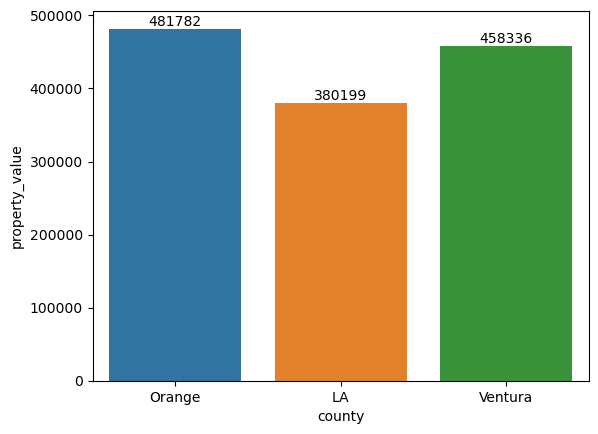

In [55]:
for col in cat_cols:
    sns.barplot(data=train, x=col, y='property_value', errorbar=None)
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')
    plt.show()

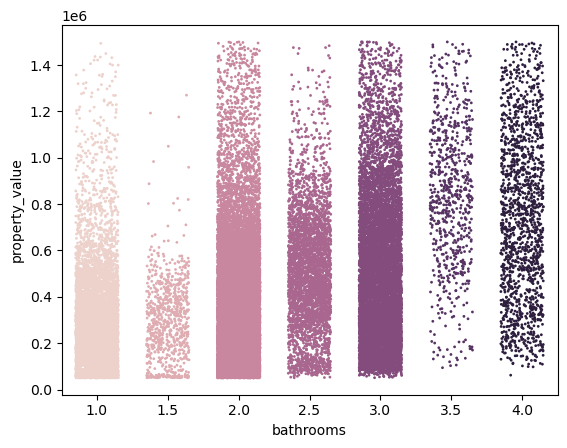

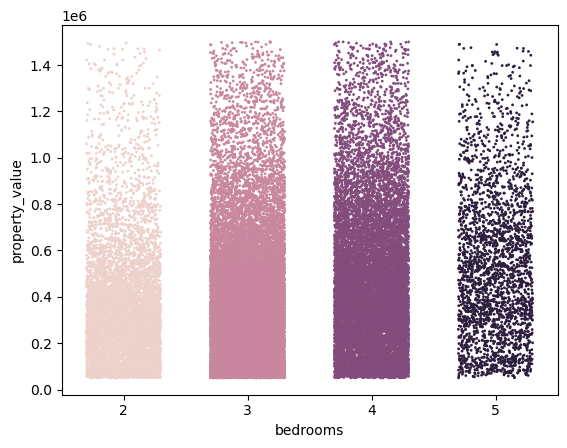

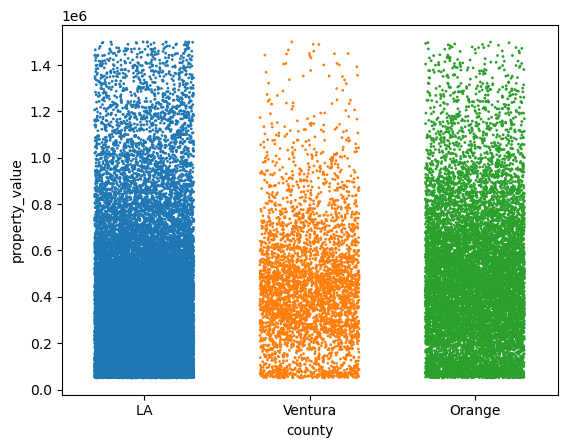

In [56]:
for col in cat_cols:
    sns.stripplot(data=df, x=col, y='property_value', hue=col, jitter=.3,
              size=2, legend=False)
    plt.show()

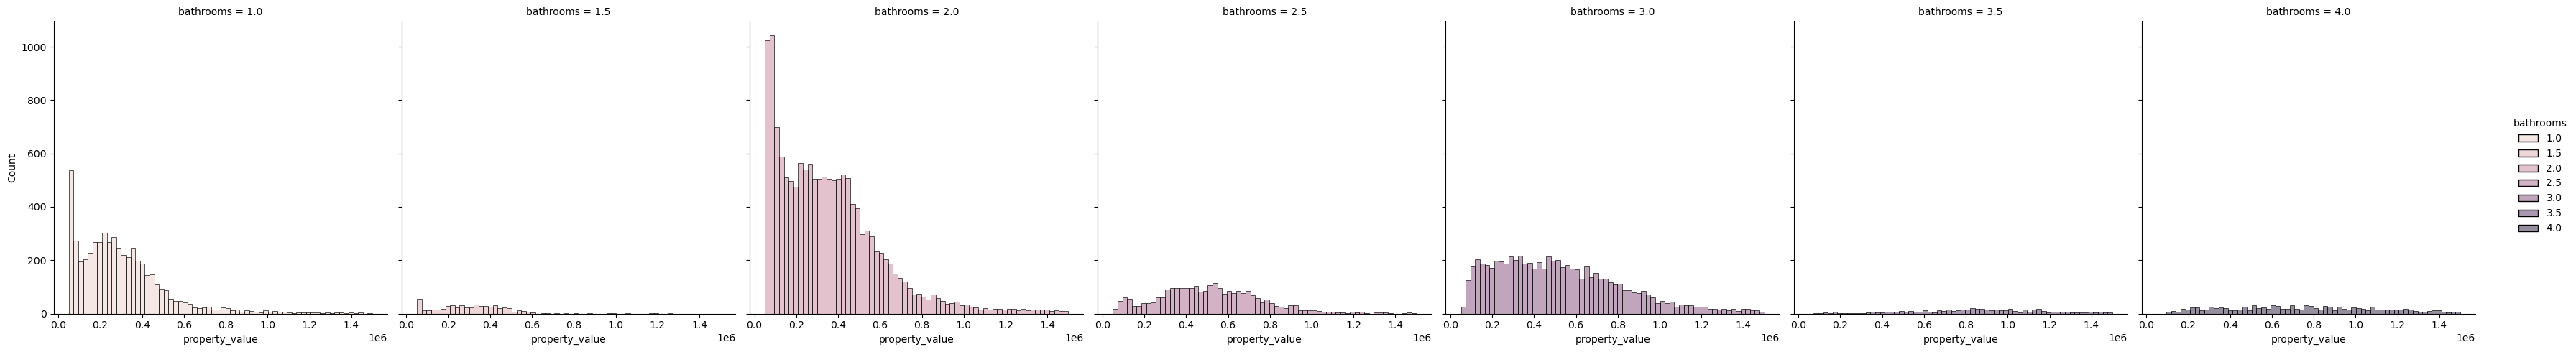

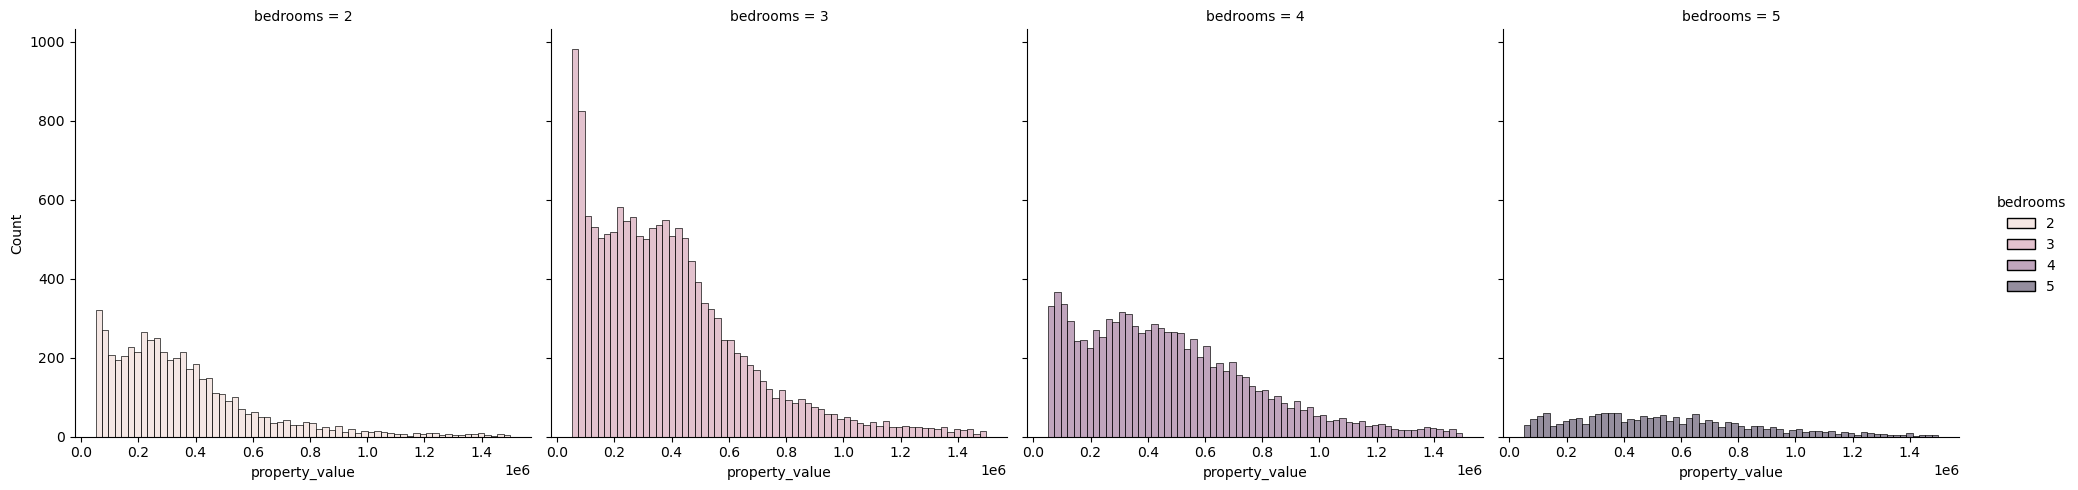

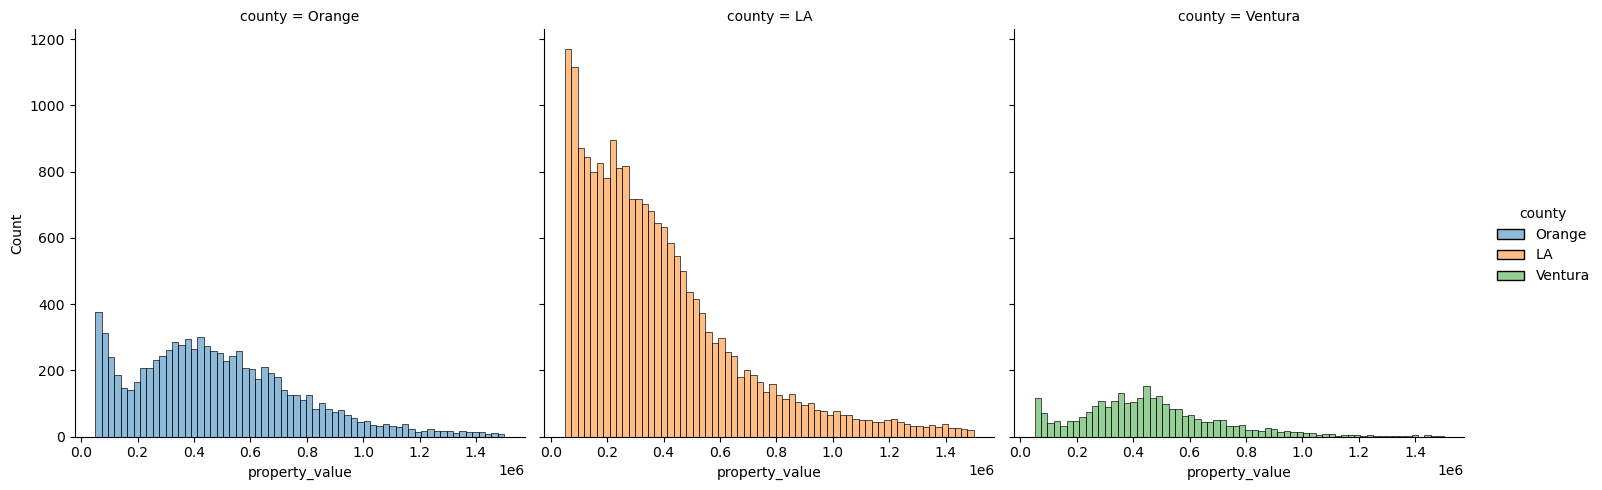

In [57]:
for col in cat_cols:
    sns.displot(col=col, x='property_value', data=train, hue=col)
    plt.show()

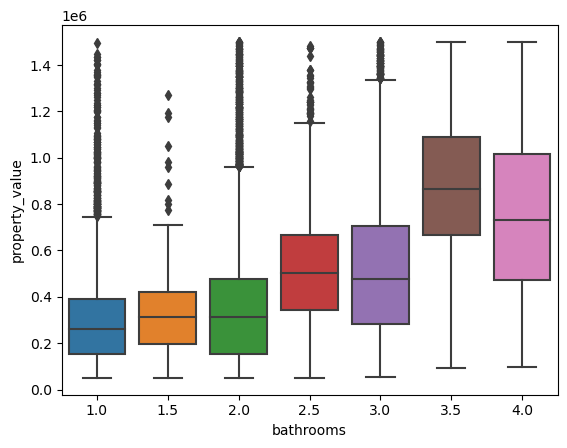

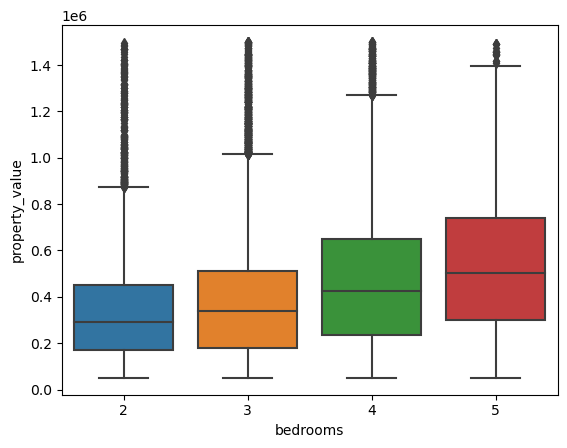

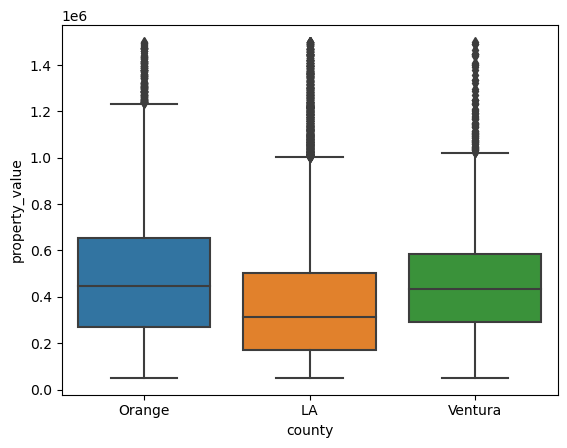

In [58]:
for col in cat_cols:
    sns.boxplot(x=col, y='property_value', data=train)
    plt.show()

In [59]:
def explore_bivariate_cat_to_cont_target(df, target, cat_cols=None):
    '''
    Explores categorical feature relationships to continuous target
    Provides descriptive stats for each feature category
    '''
#     if cat_cols == None:
#         cat_cols = get_cat_and_cont_cols(df)[0]
        
    for col in cat_cols:
        print(f'{col} group {target} stats')
        display(df.groupby(col)[target].describe().T)
        
        plot_bivariate_cat_to_cont_target_charts(df, target, col)
        

def plot_bivariate_cat_to_cont_target_charts(df, target, col):
    print(f'{col} group {target} averages')
    sns.barplot(data=df, x=col, y=target, errorbar=None)
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')
    plt.show()

    print(f'{col} group {target} distributions')
    sns.displot(data=df, x=target, col=col, hue=col)
    plt.show()
    sns.stripplot(data=df, x=col, y=target, hue=col, jitter=.3,
                  size=1.5, legend=False)
    plt.show()

    print(f'{col} group {target} boxplots')
    sns.boxplot(data=df, x=col, y=target)
    plt.show()

bathrooms group property_value stats


bathrooms,1.00,1.50,2.00,2.50,3.00,3.50,4.00
count,5271.00,552.00,14578.00,2649.00,6780.00,499.00,1066.00
mean,299696.47,313413.88,353446.98,514635.76,519509.37,864760.43,745643.77
std,210972.36,175280.74,250232.19,244036.64,301000.49,308995.77,351642.28
min,50270.00,50516.00,50067.00,51614.00,52759.00,94107.00,97640.00
25%,151244.00,195012.50,153566.75,344422.00,280635.00,666929.00,471968.00
50%,261397.00,312590.00,311972.00,503583.00,478442.00,864750.00,732490.00
75%,390000.00,420000.00,477237.50,667919.00,705390.25,1088708.50,1015310.50
max,1493861.00,1270326.00,1500000.00,1483677.00,1500000.00,1500000.00,1500000.00


bathrooms group property_value averages


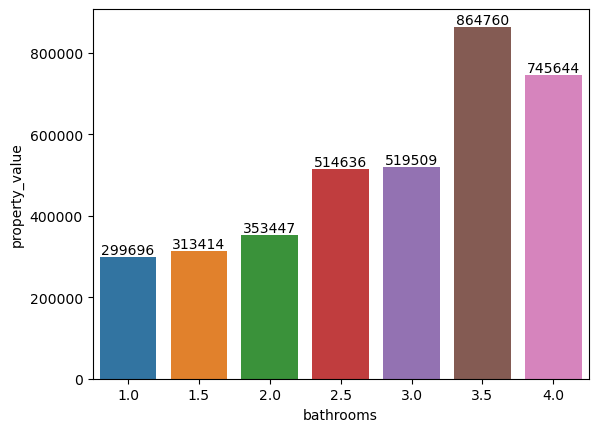

bathrooms group property_value distributions


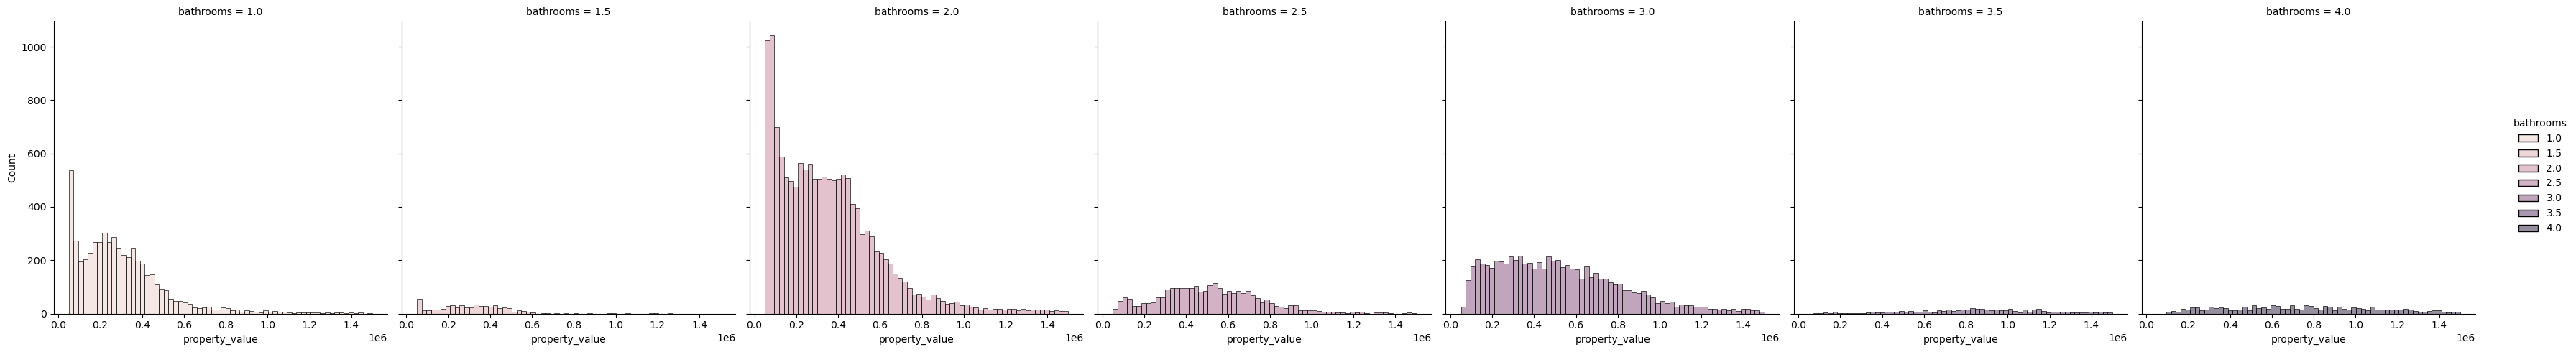

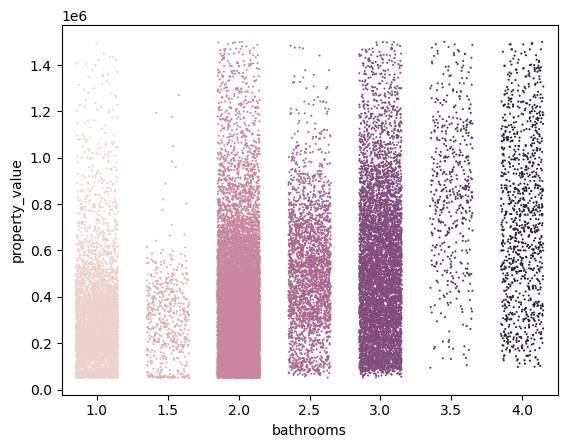

bathrooms group property_value boxplots


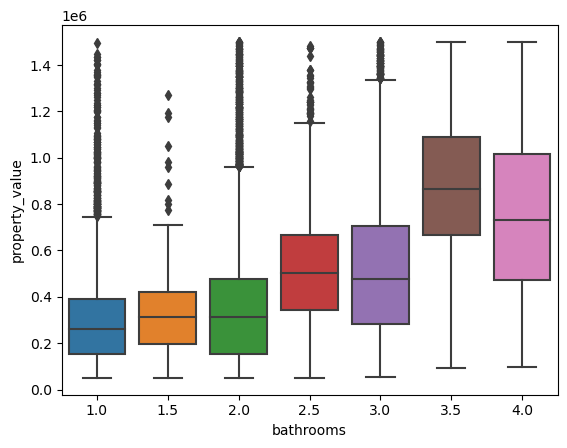

bedrooms group property_value stats


bedrooms,2,3,4,5
count,5098.00,15014.00,9466.00,1817.00
mean,349268.41,384986.85,472191.52,543006.12
std,250942.73,269587.53,303123.68,320177.80
min,50071.00,50067.00,50068.00,50272.00
25%,169925.75,179051.75,236098.50,299274.00
50%,292000.00,338470.00,423769.00,501370.00
75%,451719.75,513222.75,649931.75,740050.00
max,1493861.00,1500000.00,1500000.00,1490000.00


bedrooms group property_value averages


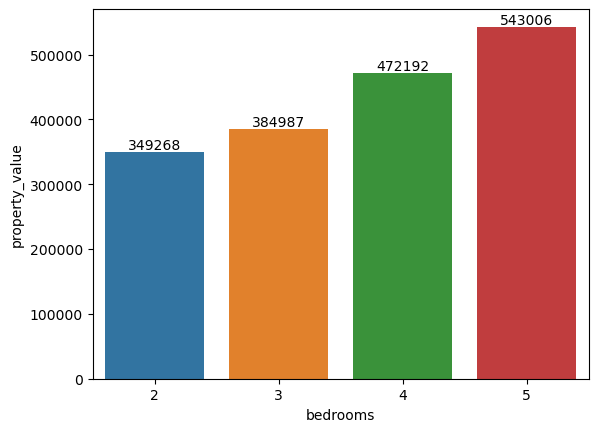

bedrooms group property_value distributions


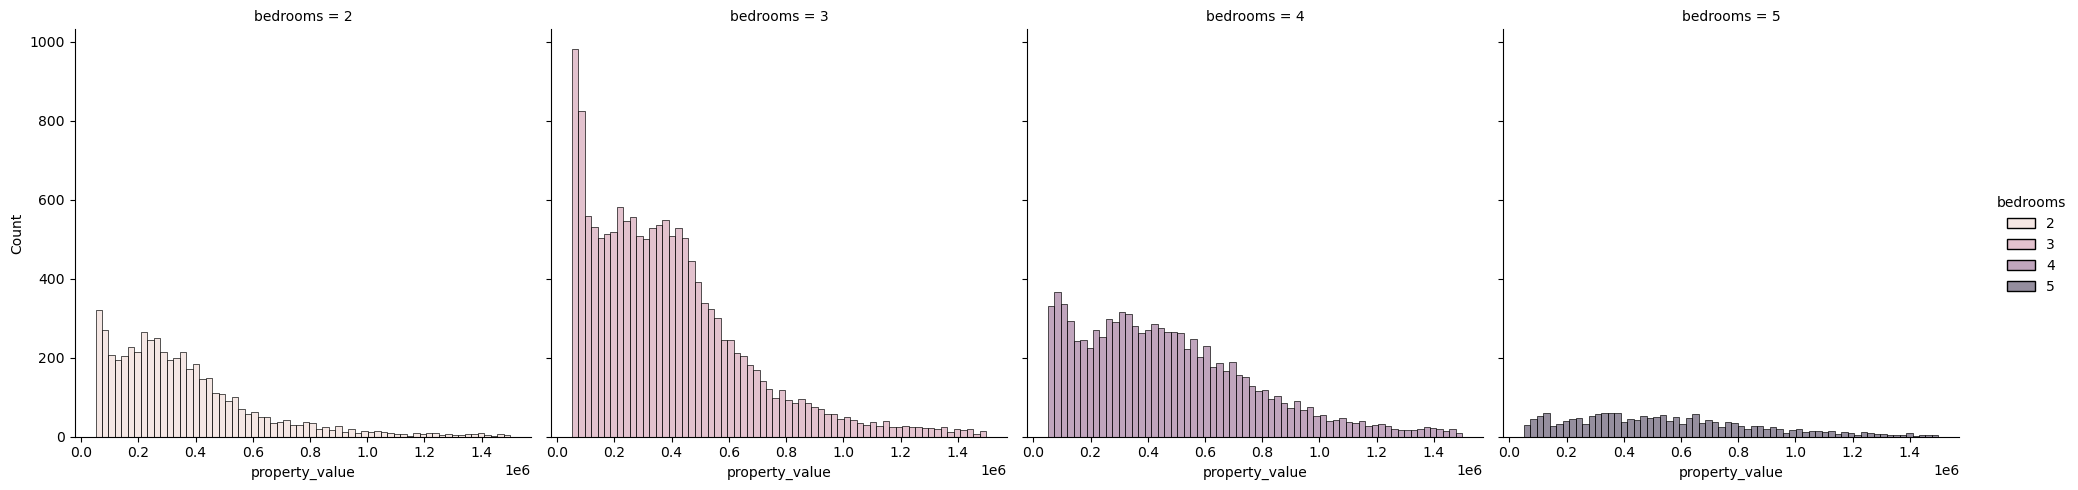

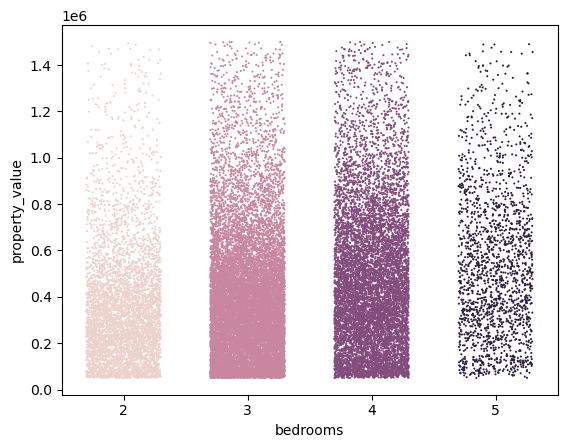

bedrooms group property_value boxplots


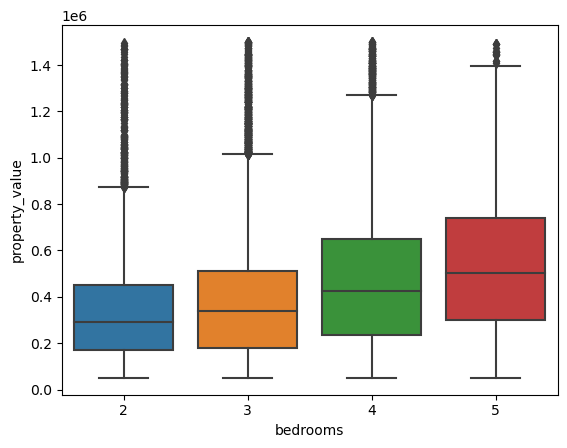

county group property_value stats


county,LA,Orange,Ventura
count,20117.00,8513.00,2765.00
mean,380198.96,481781.73,458336.24
std,282446.22,290397.28,250969.37
min,50067.00,50091.00,50640.00
25%,168903.00,269116.00,292260.00
50%,311846.00,445088.00,435323.00
75%,503100.00,654567.00,583568.00
max,1500000.00,1499208.00,1500000.00


county group property_value averages


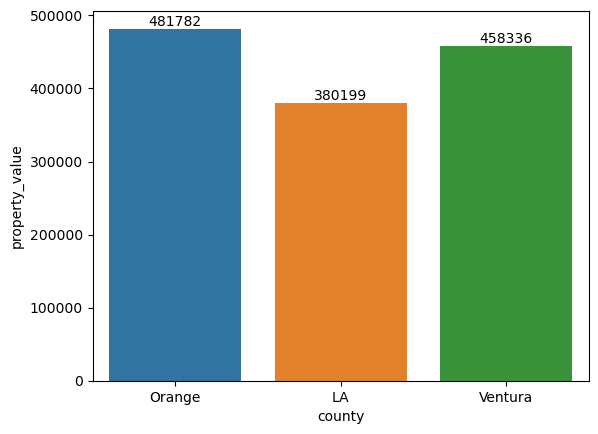

county group property_value distributions


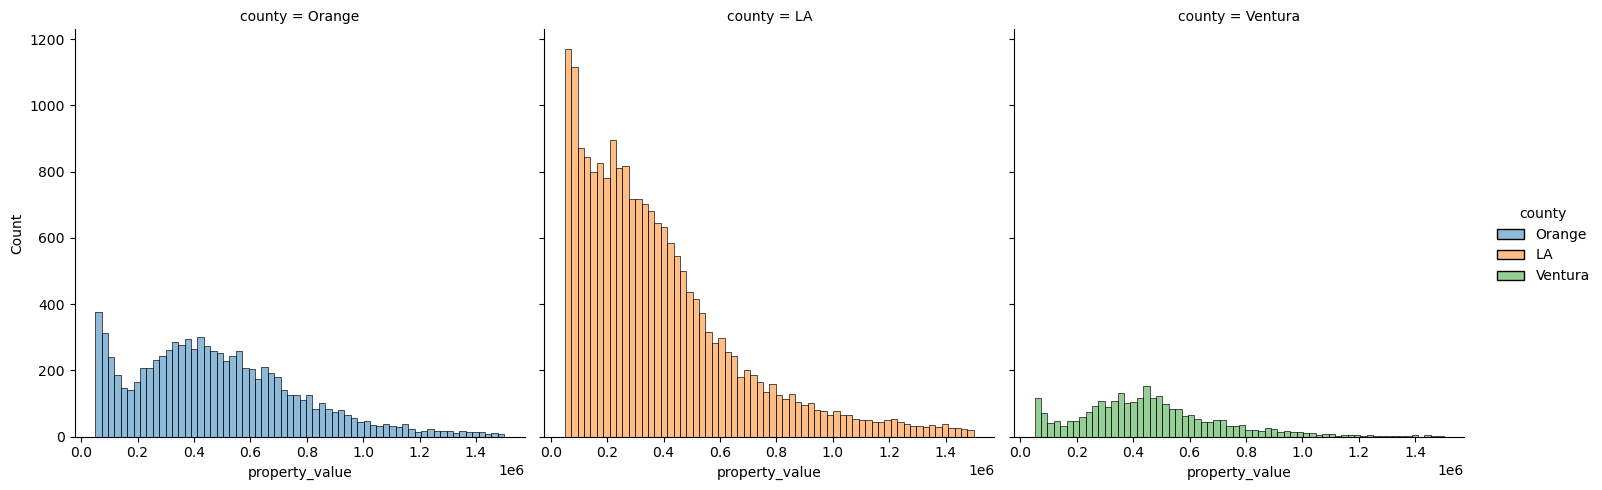

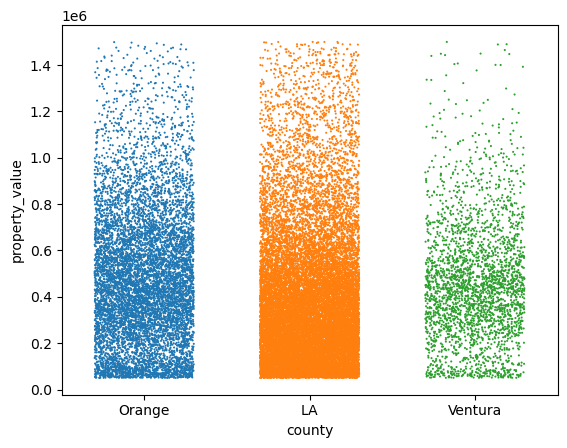

county group property_value boxplots


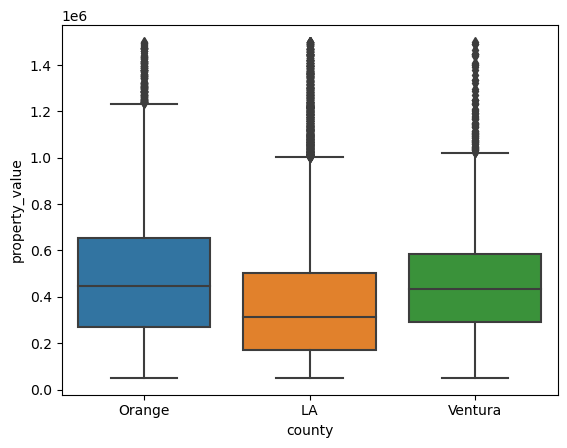

In [60]:
explore_bivariate_cat_to_cont_target(train, 'property_value',
                                     cat_cols=explore_utils.get_cat_and_cont_cols(train)[0])

Insights:
- Categorize bathrooms fro modeling to:
    - 1-2 bathrooms (~300k avg property value)
    - 2.5-3 bathrooms (~515k avg property value)
    - 3.5-4 bathrooms (~800k avg property value)
- Bedrooms could be worth modeling on as a categorical variable
- County doesn't tell us a lot on property value, but I could later explore zipcodes

**Which features appear to relate to property value the most?**

Visualize

In [293]:
def plot_target_heatmap(df):
    sns.set_style('white')
    plt.figure(figsize=(2,3))
    plt.title('Feature Correlations to Property Value', fontsize=10, pad=10)

    ax = sns.heatmap(df.corr()['property_value'].sort_values(ascending=False).to_frame().iloc[1:,:],
                     linewidths=.5, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, square=True,
                    yticklabels=['SqFt', 'Bathrooms','Bedrooms','Age (years)'],
                    xticklabels=['Propety Value'])

    plt.tick_params(axis='both', which='both', bottom=False, left=False)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=6) 
    cbar.set_ticks([-1, -.5, 0, .5, 1])

    plt.show()

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_10160/84088381.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr()['property_value'].sort_values(ascending=False).to_frame().iloc[1:,:],


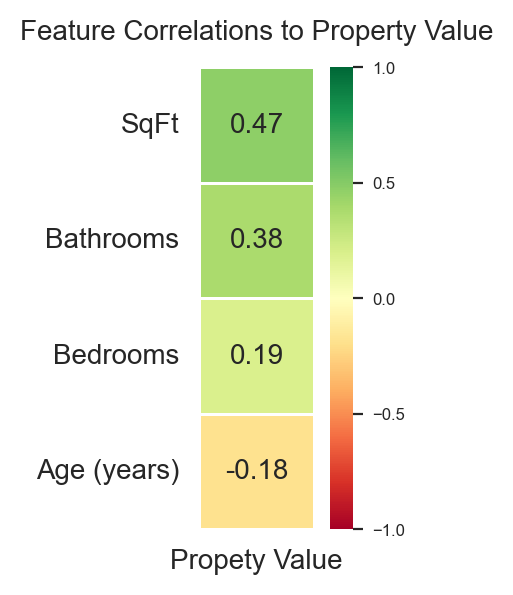

In [294]:
plot_target_heatmap(train)

Text(27.40625, 0.5, 'Property\nValue')

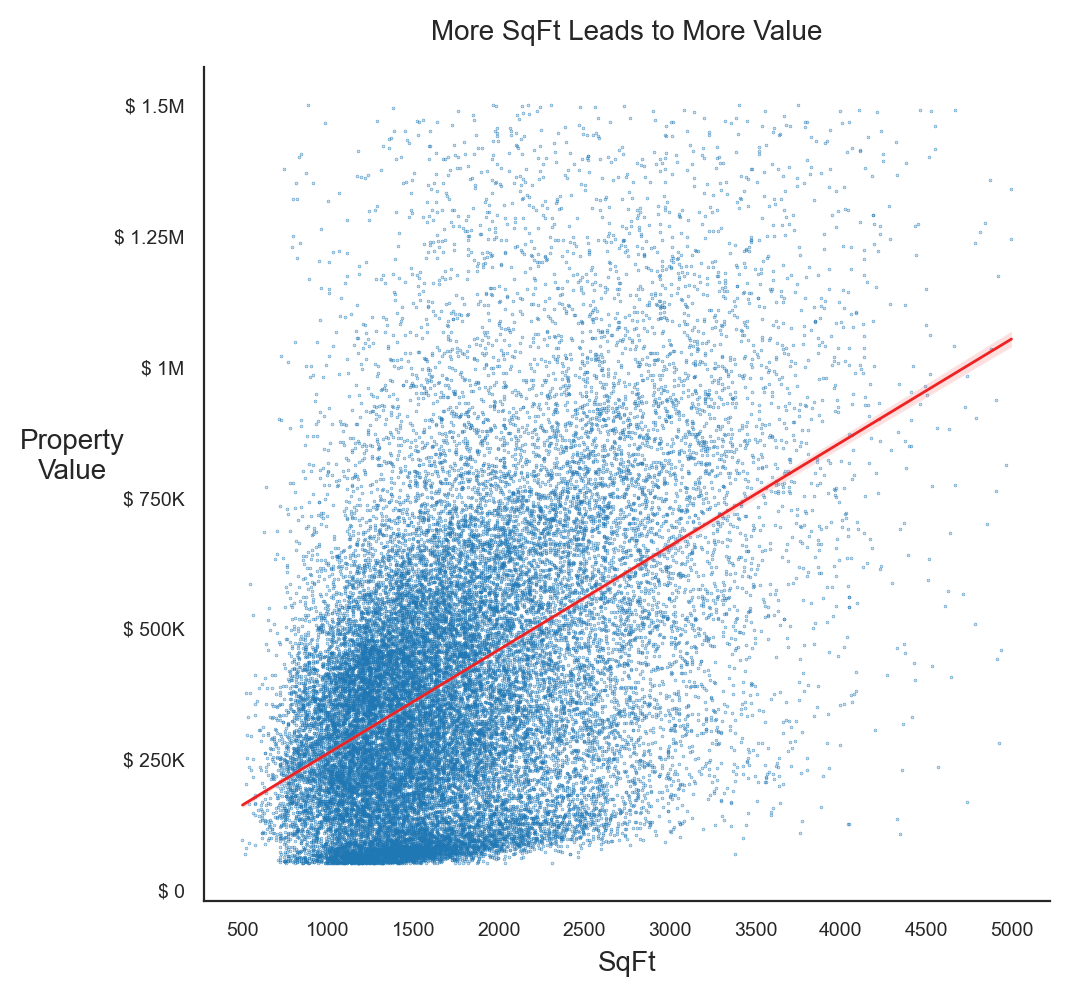

In [295]:
sns.lmplot(data=train, x='sqft', y='property_value', 
           scatter_kws = {'s':.05},
           line_kws = {'linewidth':1, 'color':'#EE2222'})

plt.title('More SqFt Leads to More Value', fontsize=10, pad=10)
plt.xticks(ticks=np.arange(500, 5001, 500), fontsize=7)
plt.xlabel('SqFt', fontsize=10)
plt.yticks(ticks=np.arange(0, 1_500_001, 250_000),
           labels=['$ 0', '$ 250K', '$ 500K', '$ 750K', '$ 1M', '$ 1.25M', '$ 1.5M'],
           fontsize=7)
plt.ylabel('Property\nValue', rotation=0, fontsize=10, labelpad=15)

In [297]:
def plot_sqft_to_value(df):
    sns.lmplot(data=df, x='sqft', y='property_value', height=4,
               scatter_kws = {'s':.001, 'alpha': 1},
               line_kws = {'linewidth':1, 'color':'#EE2222'})

    plt.title('More SqFt Leads to More Value', fontsize=9, pad=10)
    plt.xticks(ticks=np.arange(500, 5001, 500), fontsize=7)
    plt.xlabel('SqFt', fontsize=9)
    plt.yticks(ticks=np.arange(0, 1_500_001, 250_000),
               labels=['$ 0', '$ 250K', '$ 500K', '$ 750K', '$ 1M', '$ 1.25M', '$ 1.5M'],
               fontsize=7)
    plt.ylabel('Property\nValue', rotation=0, fontsize=9, labelpad=12)

In [ ]:
plot_sqft_to_value(train)

- Statistical test
    * Pearson correlation test
    * Hypotheses and significance level
        * $H_0$: There is no linear relationship between property value and square footage.
        * $H_a$: There is some linear relationship between property value and square footage.
        * $\alpha = .05$
- Verify Assumptions
    Normality: distributions are right skewed but we can bypass this with large sample sizes
    
Test:

In [236]:
r, p = stats.pearsonr(train['property_value'], train['sqft'])
r, p

(0.4692160238974564, 0.0)

There's signicant evidence that there is a moderate positive correlation between property value and square footage.

**Do home values vary significantly among the 3 counties?**

Visualize

In [345]:
def plot_value_average_by_count(df, target, category):
    
    plt.figure(figsize=(4,3))
    
    target_label = ' '.join([word.capitalize() for word in target.split('_')])
    cat_label = ' '.join([word.capitalize() for word in category.split('_')])
    
    sns.barplot(data=df, x=category, y=target, errorbar=None,
            order=train.groupby(category)[target].mean().sort_values().index,
            color='#33AA33')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'$ {str(round(p.get_height(), -3))[:3]}K', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

    plt.title(f'Average {target_label} by {cat_label}', fontsize=10, pad=10)

    plt.xlabel(cat_label, fontsize=8, labelpad=5)
    plt.xticks(fontsize=7)

    plt.ylabel('\n'.join([word.capitalize() for word in target.split('_')]),
               rotation=0, fontsize=8, labelpad=15)
    plt.yticks(ticks=np.arange(0, 600_001, 100_000),
               labels=['', '$ 100K', '$ 200K', '$ 300K', '$ 400K', '$ 500K', '$ 600K'],
               fontsize=7)

    plt.tick_params(axis='both', which='both', bottom=False, left=False)

    sns.despine()
    plt.show()

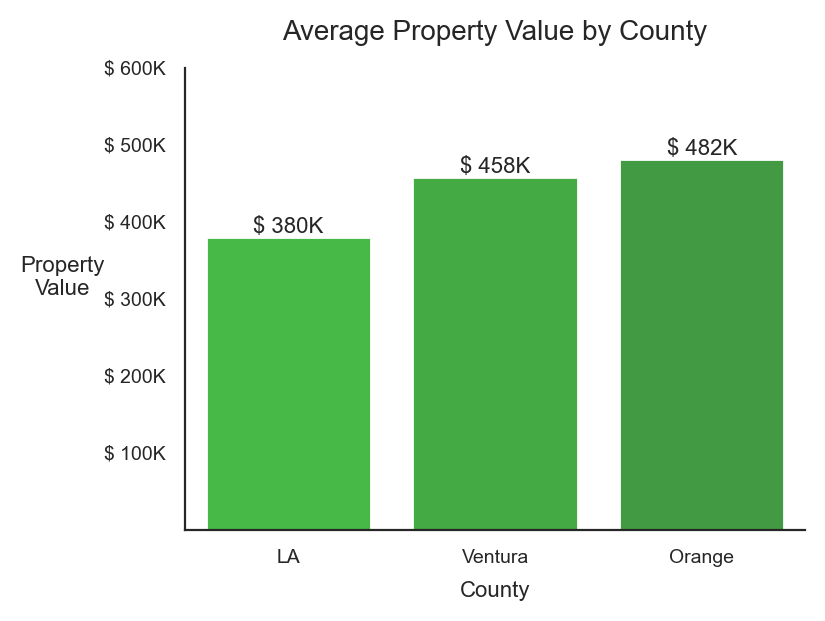

In [346]:
plot_target_average_by_category(train, 'property_value', 'county')

- Statistical test
    * ANOVA T-Test
    * Hypotheses and significance level
        * $H_0$: There is no difference in property value for homes in each county.
        * $H_a$: There is a difference in property value for homes in each county.
        * $\alpha = .05$
    * verify assumptions
        * Independence: Assumption met
        * Normality: Property values are right skewed, but assumption is met with large sample sizes
        * Equal Variances: Check with Levene's test
            * Variances are not equal, so we will set `equal_var=False` for the test

In [ ]:
churner_data = train[train['churn']==1]
non_churner_data = train[train['churn']==0]
print(f"tenure variance for churners: {churner_data['tenure'].var()}")
print(f"tenure variance for non-churners: {non_churner_data['tenure'].var()}")
stat_levene, p_levene = stats.levene(churner_data['tenure'], non_churner_data['tenure'])
print(f'''A p value of {p_levene:.2e}, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal''')

Run test

In [ ]:
scipy.stats.f_oneway(samp1, samp2, samp3)

**Do home values vary significantly among those with X bedrooms?**

Visualize

In [347]:
def plot_value_average_by_bathrooms(df, target, category):
    
    plt.figure(figsize=(6,3))
    
    target_label = ' '.join([word.capitalize() for word in target.split('_')])
    cat_label = ' '.join([word.capitalize() for word in category.split('_')])
    
    sns.barplot(data=df, x=category, y=target, errorbar=None, color='#33AA33')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'$ {str(round(p.get_height(), -3))[:3]}K', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

    plt.title(f'Average {target_label} by {cat_label}', fontsize=10, pad=10)

    plt.xlabel(cat_label, fontsize=8, labelpad=5)
    plt.xticks(fontsize=7)

    plt.ylabel('\n'.join([word.capitalize() for word in target.split('_')]),
               rotation=0, fontsize=8, labelpad=15)
    plt.yticks(ticks=np.arange(0, 900_001, 100_000),
               labels=['', '$ 100K', '$ 200K', '$ 300K', '$ 400K', '$ 500K',
                       '$ 600K', '$ 700K', '$ 800K', '$ 900K'],
               fontsize=7)

    plt.tick_params(axis='both', which='both', bottom=False, left=False)

    sns.despine()
    plt.show()

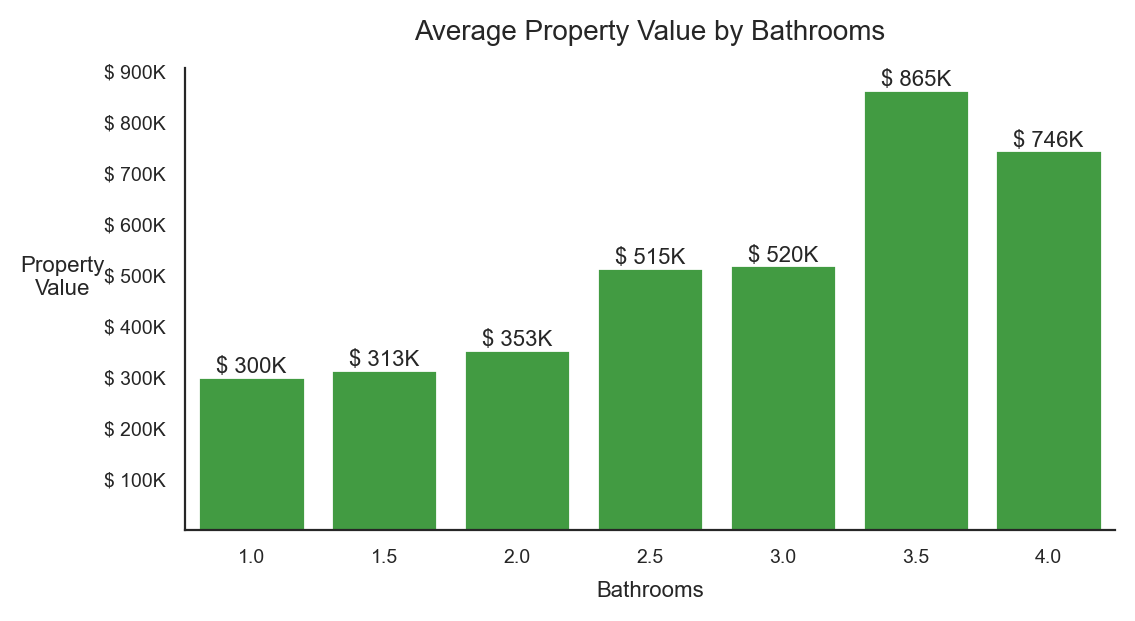

In [348]:
plot_value_average_by_bathrooms(train, 'property_value', 'bathrooms')

**Do home values vary significantly among those with X bathrooms?**

Visualize

In [349]:
def plot_value_average_by_bathrooms(df, target, category):
    
    plt.figure(figsize=(6,3))
    
    target_label = ' '.join([word.capitalize() for word in target.split('_')])
    cat_label = ' '.join([word.capitalize() for word in category.split('_')])
    
    sns.barplot(data=df, x=category, y=target, errorbar=None, color='#33AA33')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'$ {str(round(p.get_height(), -3))[:3]}K', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

    plt.title(f'Average {target_label} by {cat_label}', fontsize=10, pad=10)

    plt.xlabel(cat_label, fontsize=8, labelpad=5)
    plt.xticks(fontsize=7)

    plt.ylabel('\n'.join([word.capitalize() for word in target.split('_')]),
               rotation=0, fontsize=8, labelpad=15)
    plt.yticks(ticks=np.arange(0, 650_001, 100_000),
               labels=['', '$ 100K', '$ 200K', '$ 300K', '$ 400K', '$ 500K',
                       '$ 600K'],
               fontsize=7)

    plt.tick_params(axis='both', which='both', bottom=False, left=False)

    sns.despine()
    plt.show()

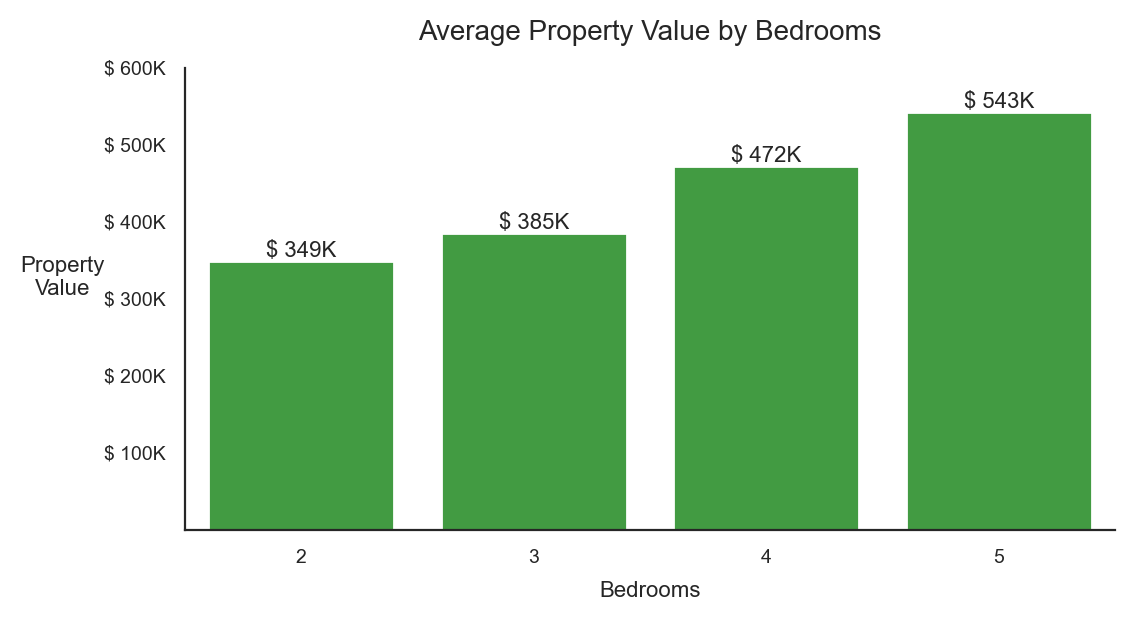

In [350]:
plot_value_average_by_bathrooms(train, 'property_value', 'bedrooms')

- Statistical test
    * ANOVA T-Test
    * Hypotheses and significance level
        * $H_0$: There is no difference in property value for homes in each county.
        * $H_a$: There is a difference in property value for homes in each county.
        * $\alpha = .05$
    * verify assumptions
        * Independence: Assumption met
        * Normality: Property values are right skewed, but assumption is met with large sample sizes
        * Equal Variances: Check with Levene's test
            * Variances are not equal, so we will set `equal_var=False` for the test

In [353]:
print(f"value variance for 2 bedrooms: {train[train['bedrooms']==2]['property_value'].var()}")
print(f"value variance for 3 bedrooms: {train[train['bedrooms']==3]['property_value'].var()}")
print(f"value variance for 4 bedrooms: {train[train['bedrooms']==4]['property_value'].var()}")
print(f"value variance for 5 bedrooms: {train[train['bedrooms']==5]['property_value'].var()}")
stat_levene, p_levene = stats.levene(train[train['bedrooms']==2]['property_value'],
                                     train[train['bedrooms']==3]['property_value'],
                                     train[train['bedrooms']==4]['property_value'],
                                     train[train['bedrooms']==5]['property_value'])
print(f'''A p value of {p_levene:.2e}, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal''')

value variance for 2 bedrooms: 62972253221.303154
value variance for 3 bedrooms: 72677437730.732
value variance for 4 bedrooms: 91883967767.4036
value variance for 5 bedrooms: 102513821252.43073
A p value of 3.18e-103, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal


Run test

In [354]:
stat, p_val = stats.f_oneway(train[train['bedrooms']==2]['property_value'],
                             train[train['bedrooms']==3]['property_value'],
                             train[train['bedrooms']==4]['property_value'],
                             train[train['bedrooms']==5]['property_value'])
stat, p_val

(408.2200356208768, 3.653893557815671e-260)

There's signicant evidence that there is some relationship between property value and bedrooms. However, the visuals show us this relationship 

I want to investigate zipcode and location

In [5]:
train, _, _ = split_data(df, validate_size=.15, test_size=.15, 
                         stratify_col='county', random_state=123)

In [6]:
train

,parcelid,id,bathrooms,bedrooms,sqft,latitude,longitude,regionidcity,regionidzip,property_value,transaction_date,age,county,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,county_LA,county_Orange,county_Ventura
35445,14362226,1205298,2.50,3,2512,33687974,-117663768,32380,96946,767135,2017-06-29,22,Orange,0,0,0,1,0,0,0,0,1,0,0,0,1,0
25232,14137692,1861110,3.00,5,2223,33901579,-117897737,24812,97043,288645,2017-05-18,52,Orange,0,0,0,0,1,0,0,0,0,0,1,0,1,0
20581,14058820,518364,4.00,5,2168,33685599,-117951180,25218,96964,591995,2017-04-27,53,Orange,0,0,0,0,0,0,1,0,0,0,1,0,1,0
27254,12169036,960930,1.00,2,954,34180005,-118128163,30187,96265,453470,2017-05-26,105,LA,1,0,0,0,0,0,0,1,0,0,0,1,0,0
36098,12346457,1543453,2.00,4,1229,33912904,-118113606,4406,96102,434377,2017-06-30,62,LA,0,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22820,11161861,331105,3.00,4,2264,34435360,-118385857,54311,96401,415548,2017-05-08,18,LA,0,0,0,0,1,0,0,0,0,1,0,1,0,0
40700,13943404,2922194,2.50,3,1461,33766774,-118004079,34780,96990,483708,2017-07-24,7,Orange,0,0,0,1,0,0,0,0,1,0,0,0,1,0
45684,17127633,2654760,2.00,3,1661,34231068,-119061944,51239,97089,293403,2017-08-17,51,Ventura,0,0,1,0,0,0,0,0,1,0,0,0,0,1
46917,14451947,982181,3.00,5,2756,33430868,-117627672,13693,96982,888343,2017-08-23,61,Orange,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [16]:
for col in train[['regionidzip', 'regionidcity']].columns:
    print(f'Number of {col}\'s: {train[col].nunique()}')

Number of regionidzip's: 372
Number of regionidcity's: 173
